## Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

a) Which variables are significant in predicting the price of a house, and
b) How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.


In [279]:
# Import required libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [280]:
#Load dataset
df = pd.read_csv('train.csv')
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [281]:
df.shape

(1460, 81)

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [283]:
df.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,201

In [284]:
# Now lets Check the percentage of missing values in all the columns
print('Percentage of Missing Values in each column is as follows:')
print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)[ round(df.isnull().sum()/len(df.index),2) > 0 ] )

Percentage of Missing Values in each column is as follows:
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


In [285]:
## As seen above 18 features have missing values, and five features have more than 45% missing values.
## Lets do EDA analysis on this data to understand how to handle these missing values i.e. either by imputation or dropping

In [286]:
##Lets drop the columns for which more than 80% of the data is missing
df.drop('PoolQC', axis=1, inplace=True)
df.drop('MiscFeature', axis=1, inplace=True)
df.drop('Alley', axis=1, inplace=True)
df.drop('Fence', axis=1, inplace=True)
print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)[ round(df.isnull().sum()/len(df.index),2) > 0 ] )

FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


## Lets perform EDA on the dataset

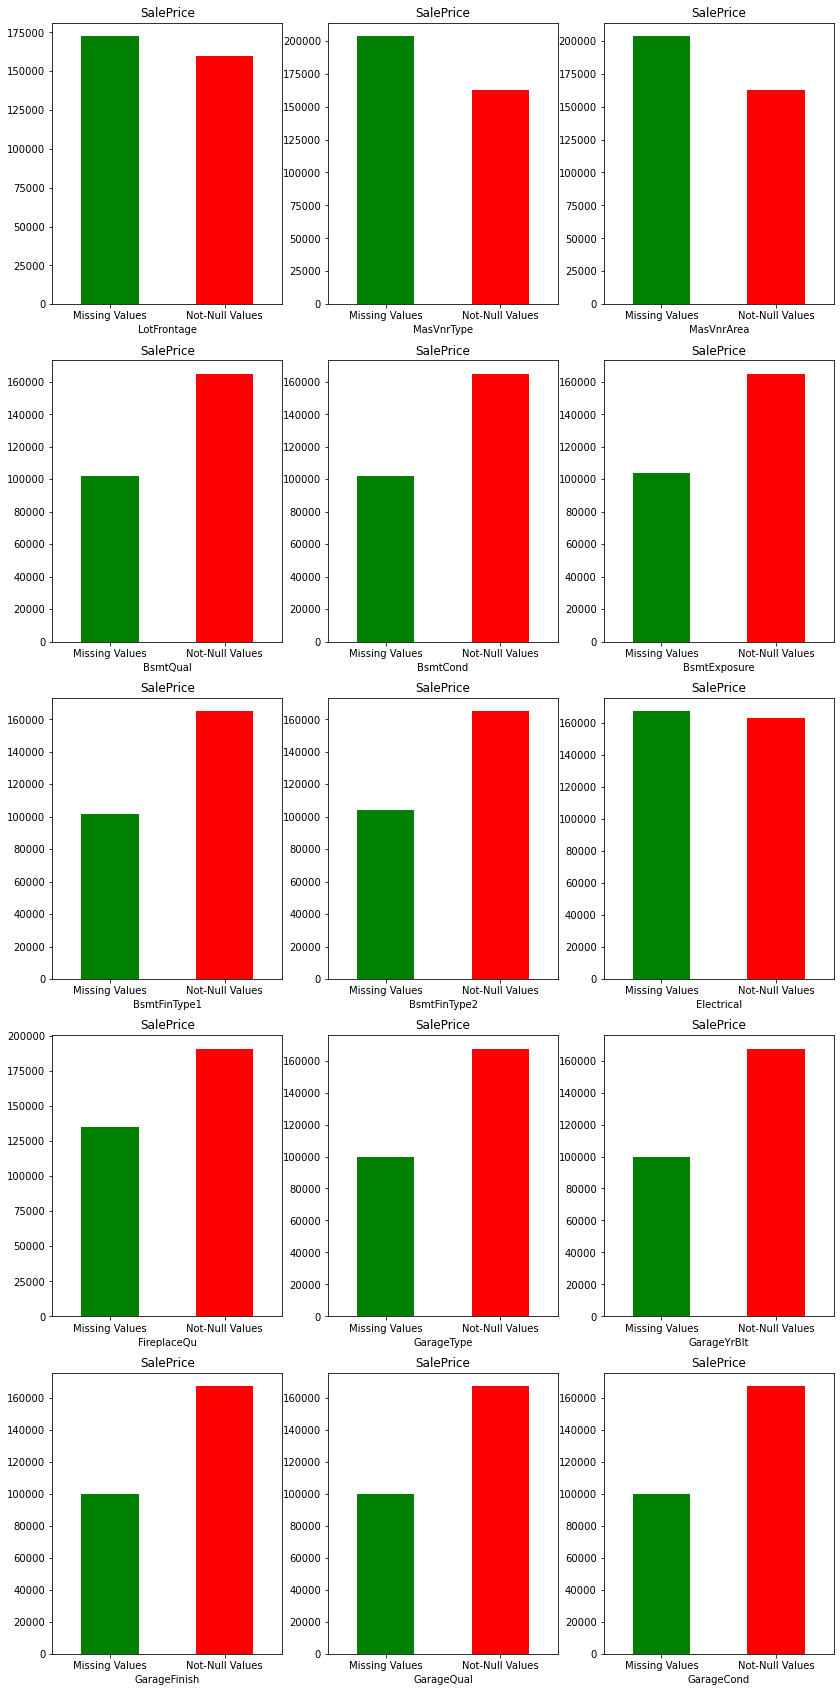

In [287]:
# Checking if missing Values have any impact on the Sale Price or not
missing_col = []
for i in df.columns:
    if df[i].isnull().sum() > 0:
        missing_col.append(i)
df_copy = df.copy()    
fig,axs= plt.subplots(5,3,figsize=(14,30),squeeze=True)
for i,ax in zip(missing_col,axs.flatten()):    
    df_copy[i] = np.where(df_copy[i].isnull(), 'Missing Values', 'Not-Null Values') 
    df_copy.groupby(i)['SalePrice'].median().plot.bar(color = list('gr'),rot=0,ax=ax,subplots=True)
plt.show()

## From above analysis we see that missing values has a significant impact on the sales price. We need to treat these missing values.

In [288]:
# Now lets Check the number of numerical features and the number of categorical features
num_columns = []
cat_columns = []
for i in df.columns:
    if df[i].dtypes != 'O':
        num_columns.append(i)
    else:
        cat_columns.append(i)
print('Total Numerical features in the dataset = ', len(num_columns))
print('Total categorical features in the dataset = ', len(cat_columns))

Total Numerical features in the dataset =  38
Total categorical features in the dataset =  39


Text(0.5, 1.0, 'House Price vs Year of Sale')

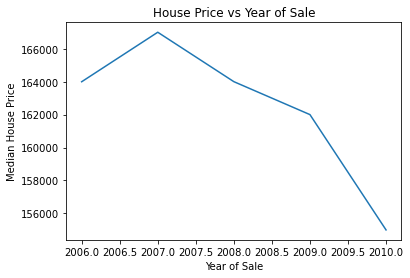

In [289]:
# Now lets Check if the median price changes with the year of sale
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year of Sale')
plt.ylabel('Median House Price')
plt.title("House Price vs Year of Sale")

## From the above analysis, we can see that the prices of house is highly dependent on the year of sale. It can be seen that the house prices drastically dropped after 2008. This might be due to the bankruptcy of Lehman brothers. Due this the demand for houses reduced there by bringing down house price.

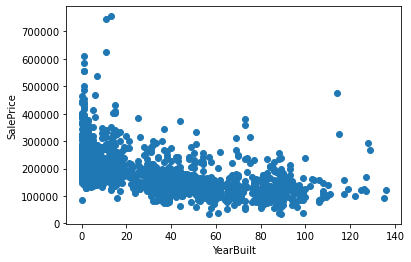

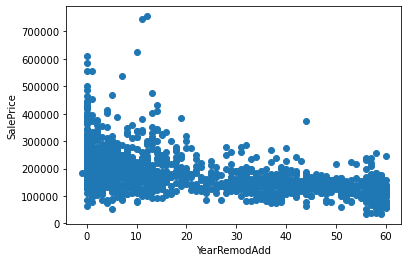

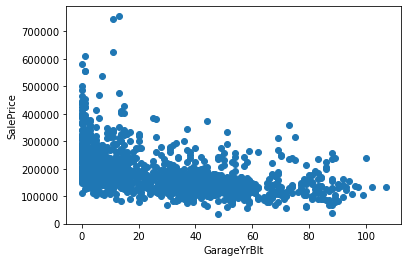

In [290]:
#Lets analyse the house prices based on few important parameters like Age of the Building / Renovated Building / Garage with the Sold Price
year_columns = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
for feature in year_columns:
    if feature!='YrSold':
        data=df.copy()
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

## Above analysis shows that age of the property makes a significant difference in house price. People prefer buying a new property hence the cost of new properties are more and the price depreciates with the increasing age of house.

In [291]:
#Since id field is not important, lets get this dropped
df.drop('Id', axis=1, inplace=True)

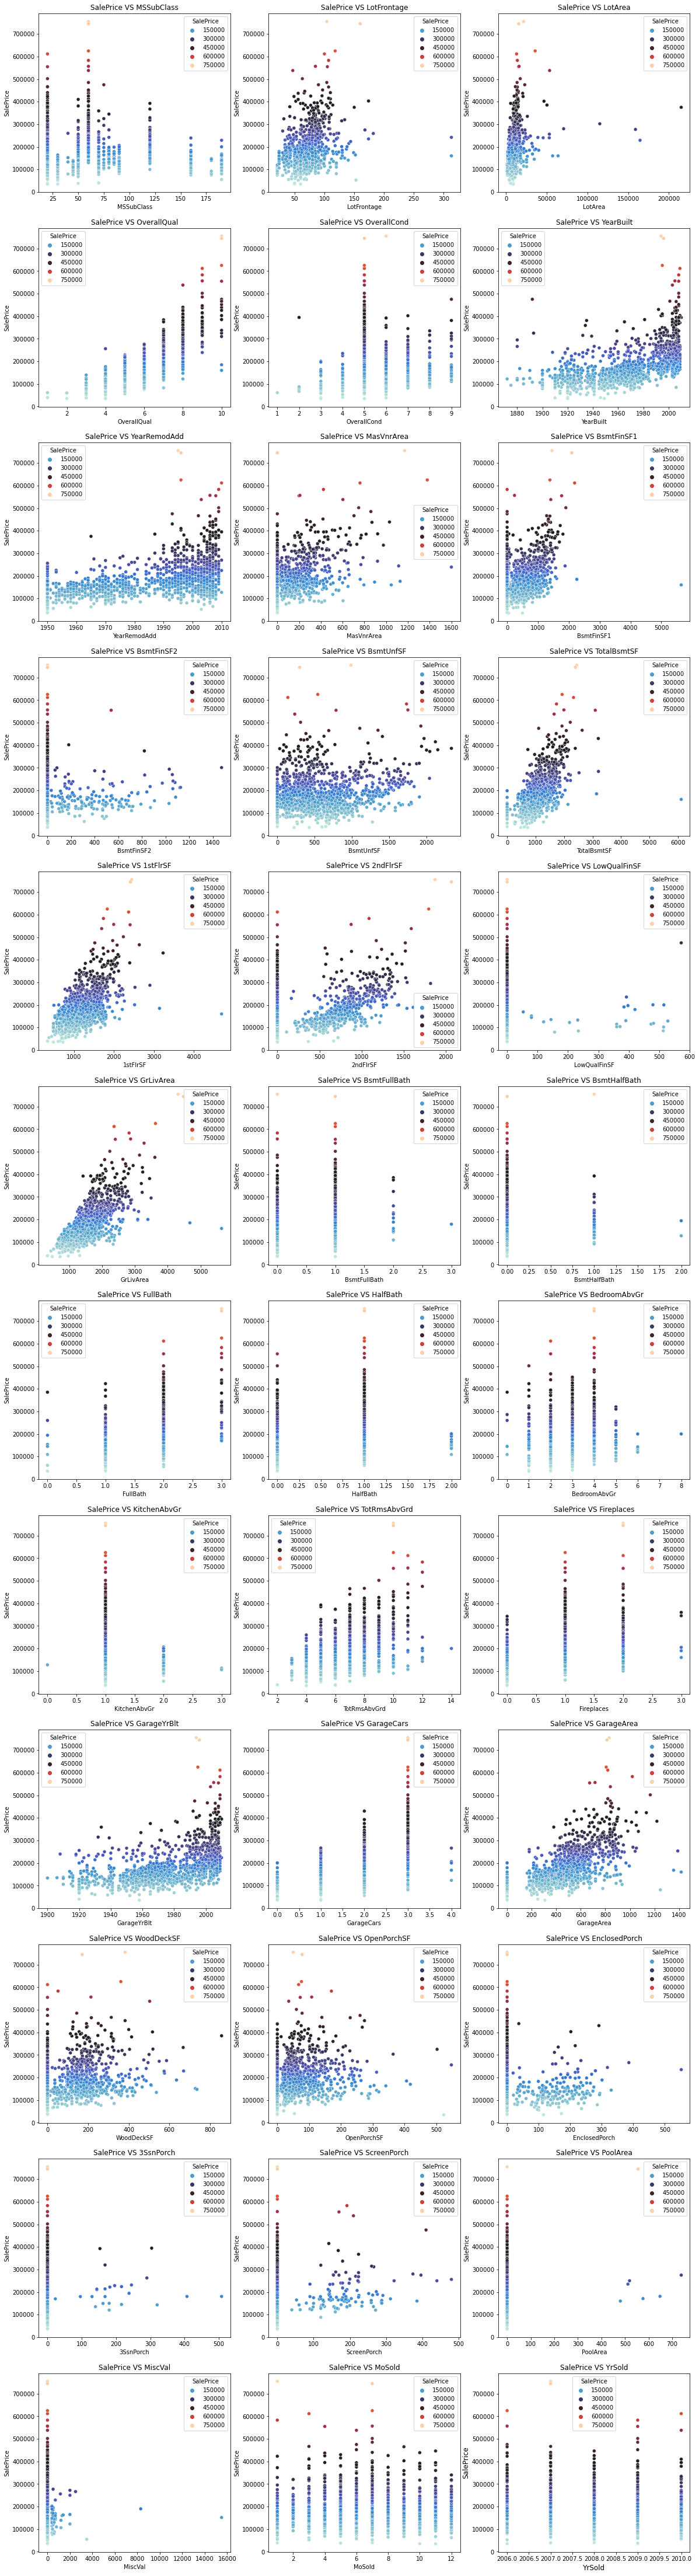

In [292]:
#Lets not visualize the impact of all numerical variables on the target variable
df_numerical = df.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(df_numerical.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_numerical,ax=ax,palette='icefire')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

## The above analysis shows that:
- 1) People prefer newer style homes compared to the old style homes. Hence the price is high for new style homes
- 2) House prices are positively corelated to the sq ft area, attached garage
- 3) House prices are negatively corealted to the age of the building. That is newer houses are costlier than old houses.
- 4) Quality of house is very important. Consumers do not prefer buying the housing with quality lesser than 7. We see the price of houses decreases drastically when the quality of the materials used is of low standards.
- 5) There is no significant difference in prices based on month of sale
- 6) People prefer homes with higher sq ft area for ground living area. Hence the price of house is positively corelated to the ground living area square feet.

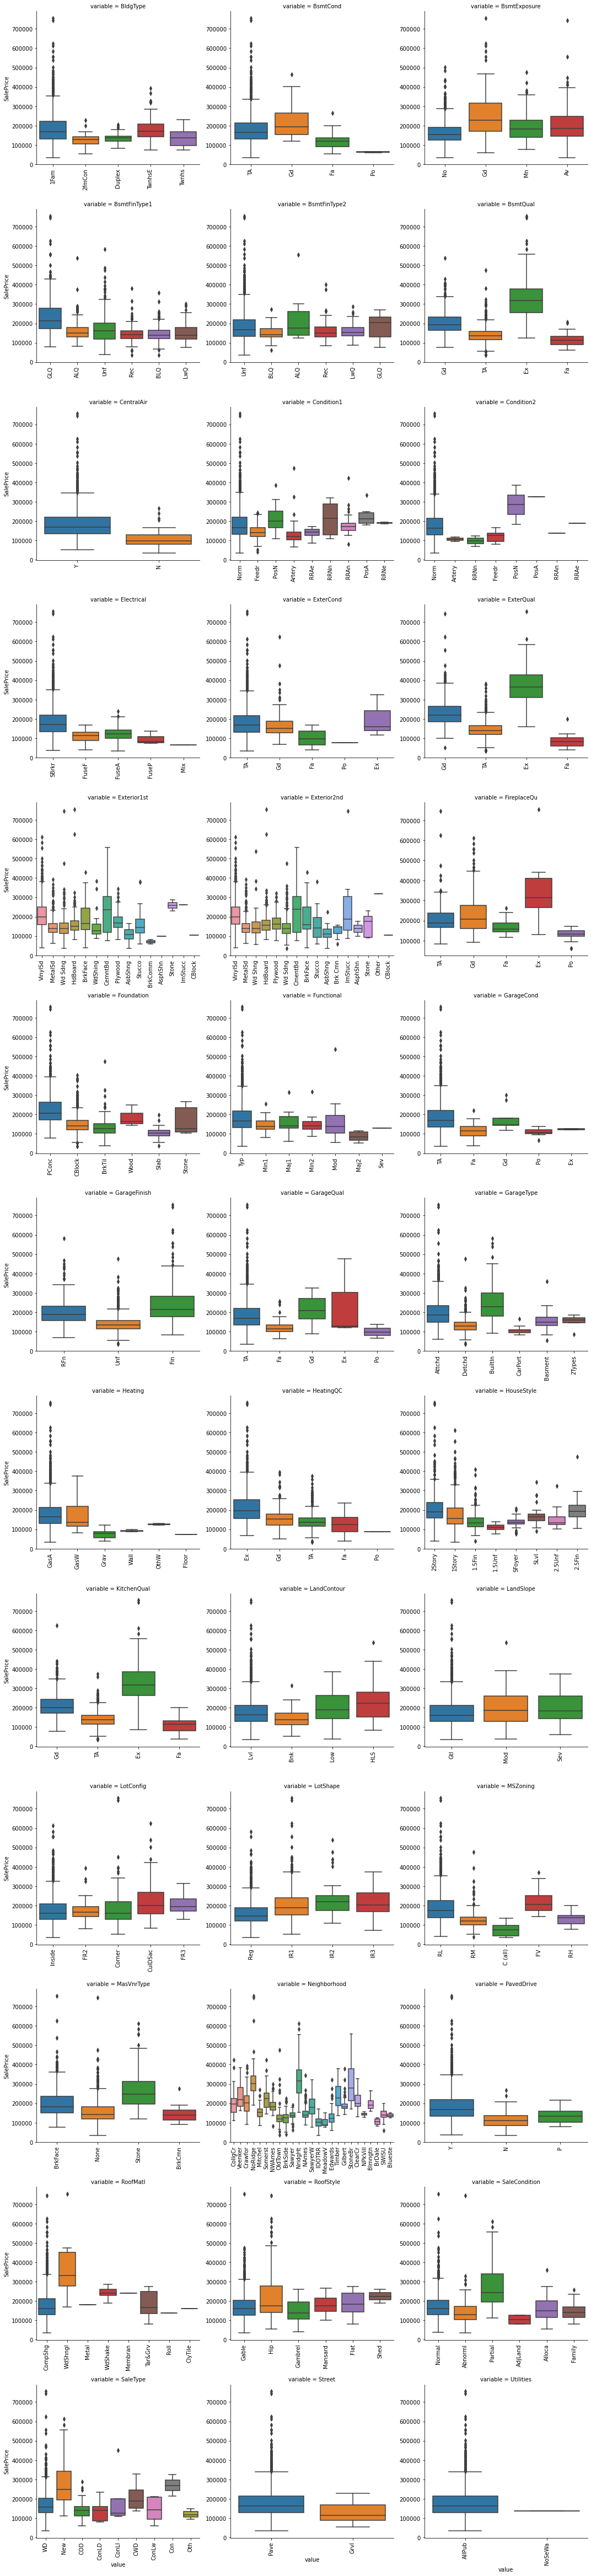

In [293]:
# Now lets Plot Categorical Features with Sale Price
def facetgrid_plotbox(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
categorical = df.select_dtypes(exclude=['int64','float64'])
f = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(df[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(facetgrid_plotbox, "value", "SalePrice")

## Above box plots show:
- 1) There are a few outliers which need to be treated. 
- 2) Houses with the basement quality, good and excellent, are sold at higher prices compared to others.
- 3) Houses having good and excellent garages are sold at higher prices.
- 4) Houses having good quality kitchens also impact the price in a postive way.
- 5) New homes have high demand and hence the price is higher.
- 6) Houses with roof top material Wood Shingles have highest demand hence the price is higher.
- 7) Consumers prefer excellent quality swimming pools hence the price for houses with excellent pools is higher.
- 8) Northridge, Northridge Heights and Stone Brook are the most demanding Neighborhoods. Hence the houses near to these locations have high price.
- 9) Consumers prefer 2nd garage hence the price for these houses are more.
- 10) Houses with Masonry veneer type stone are costlier than any other type.
- 11) Houses in floating village residential zone are costlier.
- 12) Houses with more tha 2 Story are high in demand, hence costlier.
- 13) Houses with foundation type Poured Contrete have highest demand and hence are costlier.
- 14) Demand is high for houses with electrical system Standard Circuit Breakers & Romex. Hence price of these houses are higher.
- 15) Houses with central air conditioning have higher price.


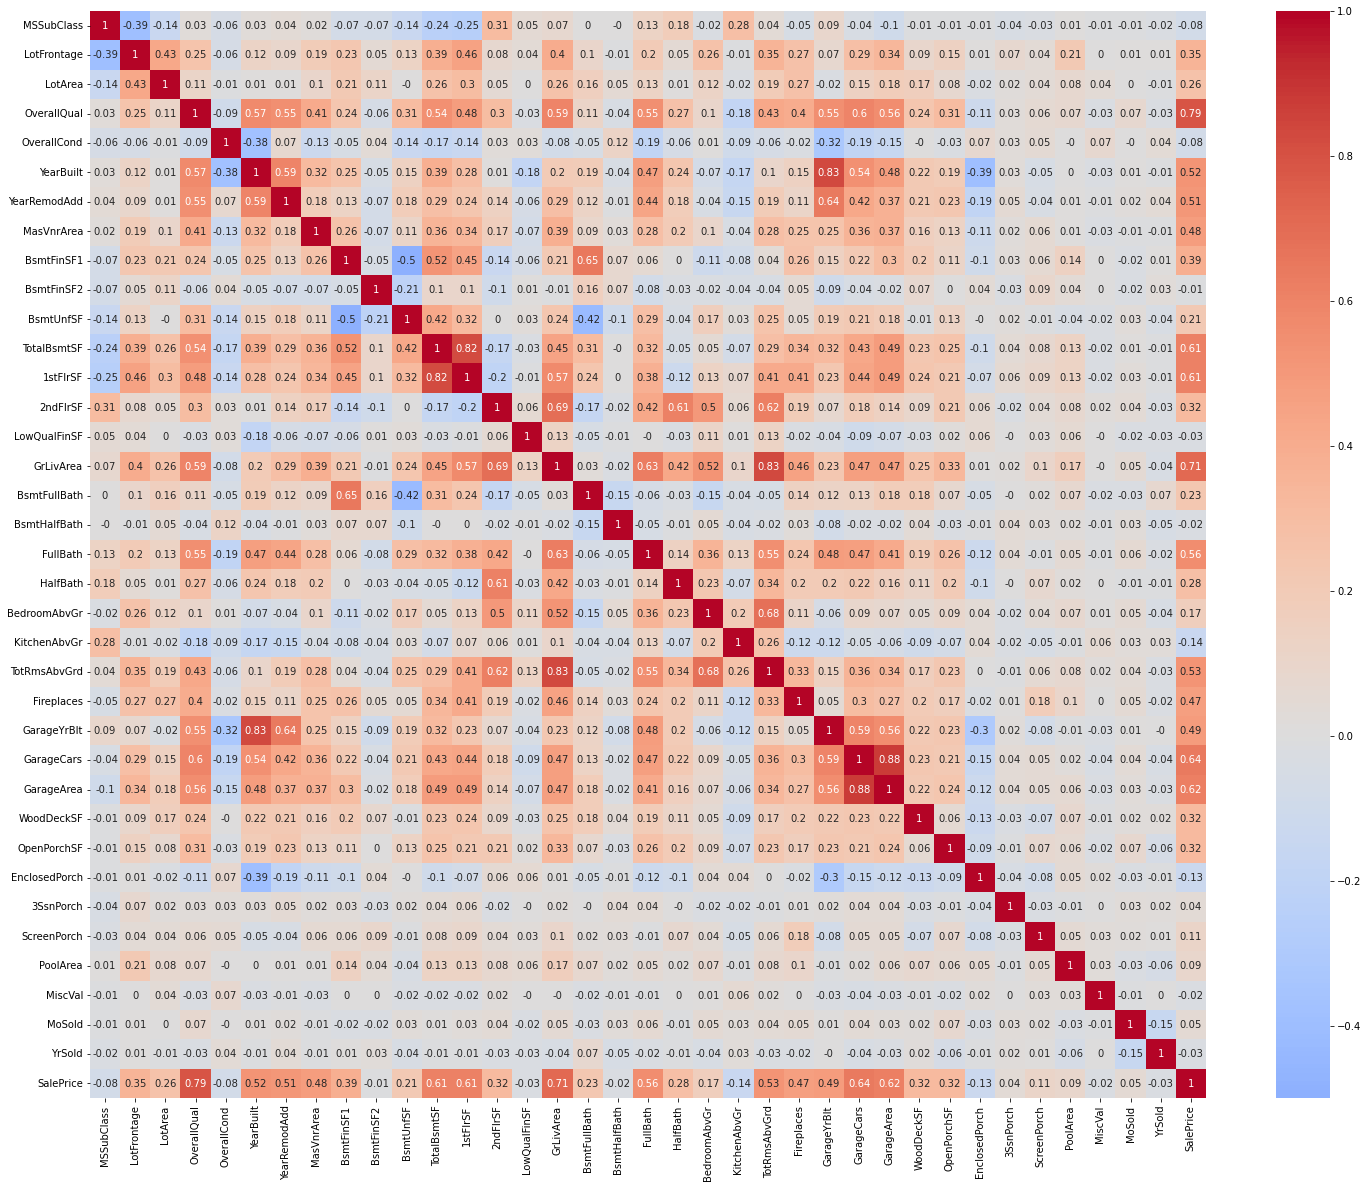

In [294]:
# Lets now check corelation
plt.subplots(figsize = (25,20))
#Let us Plot heatmap of numerical features
sns.heatmap(round(df_numerical.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

Above HeatMap shows there are highly correlated features. Let us remove the highly corelated attributes.

# Data Preparation

In [295]:
# Creating a new Column to determine the age of the property
df['house_age']=df['YrSold']-df['YearBuilt']
df['garage_age'] = df['YrSold'] - df['GarageYrBlt']
df['renovate_age'] = df['YrSold'] - df['YearRemodAdd']

df.drop('GarageYrBlt',axis=1,inplace=True)

In [296]:
# Now lets convert some numerical fields to string fields as they are categorical variables. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [297]:
# Lets Convert the Year to String since it is a categorical feature.
df[['MSSubClass']] = df[['MSSubClass']].astype(str) 
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,house_age,garage_age,renovate_age
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,5,5.0,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,31,31.0,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,7,7.0,6
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,91,8.0,36
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,8,8.0,8


## Handle missing values
###We need to impute the NaN values with None, Default or similar values, since there is a possiblity that when a certain feature is missing in that property, it is left blank.


In [298]:
#Lets impute the missing values
#NA = No Fireplace for FireplaceQu
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
#NA = No Fireplace
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
#NA = No Garage
df['GarageCond'] = df['GarageCond'].fillna('None')
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
df['garage_age'] = df['GarageQual'].fillna(0)   #No Garage No Age
#NA = No Basement
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
#NA = No Masonery Area
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [299]:
# Now lets again Check the percentage of missing values in all the columns
print('Percentage of Missing Values in each column is as follows:')
print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)[ round(df.isnull().sum()/len(df.index),2) > 0 ] )

Percentage of Missing Values in each column is as follows:
LotFrontage    17.74
dtype: float64


In [300]:
#For LotFrontage : let us replace Null value with the median of the neighbourhood
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [301]:
print(round(df.isnull().sum()/len(df.index)*100,5).sort_values(ascending=False)[ round(df.isnull().sum()/len(df.index),5) > 0 ] )

Electrical    0.06849
dtype: float64


In [302]:
#For Electrical 0.06% missing rows lets fill the missing values with mode
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [303]:
round(df.isnull().sum()/len(df.index)*100,5).sort_values(ascending=False)

MSSubClass       0.0
BedroomAbvGr     0.0
GarageType       0.0
FireplaceQu      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
HalfBath         0.0
GarageCars       0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
GarageFinish     0.0
GarageArea       0.0
MSZoning         0.0
MiscVal          0.0
garage_age       0.0
house_age        0.0
SalePrice        0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
PoolArea         0.0
GarageQual       0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
Electrical       0.0
CentralAir       0.0
HeatingQC        0.0
Neighborhood     0.0
YearBuilt        0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2   

### Now we have taken care of all the missing values.

## Lets do feature engineering

In [304]:
print(df['Utilities'].value_counts())
print(df['Street'].value_counts())
print(df['PoolArea'].value_counts())

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64


In [305]:
#Lets identify the redundant fields and get them removed
#The assumption here is if more than 80% values are same in a column then these columns does not have much impact on the model
def redundant_column(df):
    redundant = []
    for i in df.columns:
        counts = df[i].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(df) * 100 > 80:
            redundant.append(i)
    redundant = list(redundant)
    return redundant

redundant_columns = redundant_column(df)
redundant_columns


['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'BsmtFinSF2',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SaleType',
 'SaleCondition',
 'garage_age']

In [306]:
#drop the redundant columns as these will not help in model prediction
df.drop(redundant_columns,axis=1,inplace=True)


In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 48 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   object 
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1460 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   LotShape      1460 non-null   object 
 5   LotConfig     1460 non-null   object 
 6   Neighborhood  1460 non-null   object 
 7   HouseStyle    1460 non-null   object 
 8   OverallQual   1460 non-null   int64  
 9   OverallCond   1460 non-null   int64  
 10  YearBuilt     1460 non-null   int64  
 11  YearRemodAdd  1460 non-null   int64  
 12  RoofStyle     1460 non-null   object 
 13  Exterior1st   1460 non-null   object 
 14  Exterior2nd   1460 non-null   object 
 15  MasVnrType    1460 non-null   object 
 16  MasVnrArea    1460 non-null   float64
 17  ExterQual     1460 non-null   object 
 18  Foundation    1460 non-null 

In [308]:
df.shape

(1460, 48)

In [309]:
# Lets now remove outliers to make the model more robust
# From Box plot done in EDA analysis above we see that Living Area, Garage Area, Basement Area and Lot Area have outliers. 
# For other outliers we will fix during power transform
def drop_outliers(x):
    list = []
    outl_col = ['GrLivArea','GarageArea','TotalBsmtSF','LotArea']
    for col in outl_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x  
df = drop_outliers(df)
df.shape

(1455, 48)

### 5 outliers are removed

In [310]:
#Lets create new features based on the existing features
#Vintage house and rennovated house plays
#we are excluding the columns that had 90% same value as they will just act as constant
df['YearrBuiltAndRemodel']=df['YearBuilt']+df['YearRemodAdd']
# Create total area in square foot column
df['TotalSqrFoot'] = (df['BsmtFinSF1'] + df['1stFlrSF'] + df['2ndFlrSF'])
# Create total number of bathrooms column
df['TotalNoOfBathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'])
#Create column for total porch area 
df['TotalPorchSf'] = (df['OpenPorchSF'] + df['WoodDeckSF'])

In [311]:
# Lets now create Dummy Variables for Categorical features
num_col=[]
cat_col=[]
for i in df.columns:
    if df[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)
df_dummy= pd.get_dummies(df[cat_col])   
df=pd.concat([df,df_dummy],axis=1)
df= df.drop(cat_col,axis=1)        

In [312]:
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,house_age,renovate_age,YearrBuiltAndRemodel,TotalSqrFoot,TotalNoOfBathrooms,TotalPorchSf,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,65.0,8450,7,5,2003,2003,196.0,706,150,856,856,854,1710,1,2,1,3,8,0,2,548,0,61,208500,5,5,4006,2416,3.5,61,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,6,8,1976,1976,0.0,978,284,1262,1262,0,1262,0,2,0,3,6,1,2,460,298,0,181500,31,31,3952,2240,2.0,298,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0

In [313]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [314]:
# Lets Check for MultiCollinearity
correlation = X.corr()
correlation1 = correlation[abs(correlation)>=.6]
correlation2 =  correlation.where(~np.tril(np.ones(correlation.shape)).astype(np.bool))  #Let us remove repetition and 1 correlations
correlation_result = correlation2.stack()
print(correlation_result[(abs(correlation_result) > 0.6)])

OverallQual           GarageCars              0.602025
                      YearrBuiltAndRemodel    0.628465
                      ExterQual_TA           -0.647338
YearBuilt             house_age              -0.999036
                      YearrBuiltAndRemodel    0.931280
                      Foundation_PConc        0.651122
                      BsmtQual_TA            -0.632578
YearRemodAdd          renovate_age           -0.997926
                      YearrBuiltAndRemodel    0.845788
MasVnrArea            MasVnrType_None        -0.687465
BsmtFinSF1            BsmtFullBath            0.655652
                      TotalSqrFoot            0.716716
                      BsmtFinType1_Unf       -0.653551
BsmtUnfSF             BsmtFinType1_Unf        0.602664
TotalBsmtSF           1stFlrSF                0.806004
1stFlrSF              TotalSqrFoot            0.628856
2ndFlrSF              GrLivArea               0.696988
                      HalfBath                0.609557
          

In [316]:
#Drop all the columns that are highly correlated with other columns
X.drop(['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF',
        '1stFlrSF','2ndFlrSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr','Fireplaces','GarageCars',
        'WoodDeckSF','MSSubClass_120','MSSubClass_160','MSSubClass_190','MSSubClass_20',
        'MSSubClass_45','MSSubClass_50','MSSubClass_60','MSSubClass_75','MSSubClass_80','MSSubClass_85','MSSubClass_90',
        'MSZoning_FV','MSZoning_RL','LotShape_IR1','LotConfig_Corner', 'Neighborhood_NPkVill',
        'HouseStyle_1Story','RoofStyle_Flat','RoofStyle_Gable','Exterior2nd_AsbShng','Exterior2nd_BrkFace',
        'Exterior2nd_CBlock','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_MetalSd','Exterior2nd_Plywood',
        'Exterior2nd_Stucco','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng','MasVnrType_None','ExterQual_Gd','ExterQual_TA',
        'Foundation_CBlock','Foundation_Slab','BsmtQual_Gd','BsmtQual_None','BsmtExposure_None','BsmtFinType1_None',
        'KitchenQual_Gd','GarageType_Attchd','GarageType_None','GarageFinish_None', 'HeatingQC_Ex',
        'Foundation_PConc','Foundation_PConc'],
         axis=1,inplace=True)

In [317]:
X.shape

(1455, 142)

In [318]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

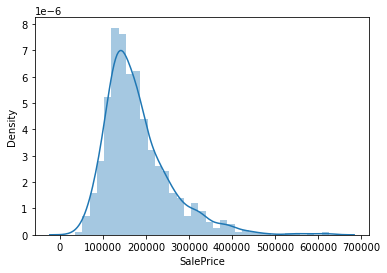

In [319]:
#Distribution of Target Variable
sns.distplot(y_train)
plt.show()

## Since data is right-skewed, we need to transform it to make it normally distributed.

In [320]:
# Lets transform the Target feature to make the data normally distributed
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())

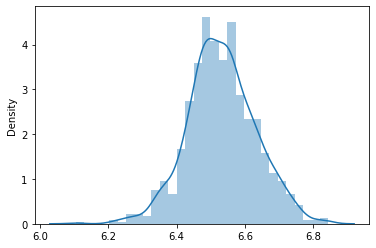

In [321]:
sns.distplot(y_train)
plt.show()

### The target variable now looks normally distributed

In [322]:
# Lets Scale the data using Minmax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = DataFrame(X_train)
X_train.columns = X.columns
X_test = scaler.transform(X_test)
X_test = DataFrame(X_test)
X_test.columns = X.columns

X_train.head()

,LotFrontage,LotArea,OverallCond,BsmtFullBath,TotRmsAbvGrd,GarageArea,OpenPorchSF,house_age,renovate_age,YearrBuiltAndRemodel,TotalSqrFoot,TotalNoOfBathrooms,TotalPorchSf,MSSubClass_180,MSSubClass_30,MSSubClass_40,MSSubClass_70,MSZoning_C (all),MSZoning_RH,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_ImStucc,Exterior2nd_Other,Exterior2nd_Stone,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,Foundation_BrkTil,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_TA,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,0.068493,0.052116,0.428571,0.5,0.333333,0.418705,0.000000,0.066176,0.150000,0.905263,0.317574,0.571429,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.136986,0.128504,0.428571,0.5,0.555556,0.618705,0.083665,0.007353,0.016667,0.978947,0.245317,0.571429,0.230355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.150685,0.118124,0.428571,0.0,0.555556,0.312230,0.095618,0.066176,0.150000,0.905263,0.335638,0.428571,0.206674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

## Ridge Regression

Fitting 11 folds for each of 28 candidates, totalling 308 fits


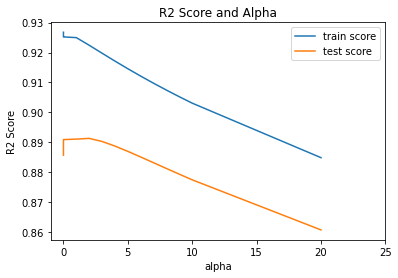

The optimum alpha is 2
The R2 Score of the model on the test dataset for optimum alpha is 0.8455681690854097
The MSE of the model on the test dataset for optimum alpha is 0.001652854697119187


In [326]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# Using RFE to find top 300 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=300)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# Lets plot mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train_rfe,y_train)
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test_rfe)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [324]:
# Lets check the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
high_vif = vif[vif['VIF']>10]
high_vif

,Features,VIF
71,Exterior1st_Plywood,inf
62,Exterior1st_AsbShng,inf
114,FireplaceQu_None,inf
113,FireplaceQu_Gd,inf
112,FireplaceQu_Fa,inf
111,FireplaceQu_Ex,inf
76,Exterior1st_WdShing,inf
75,Exterior1st_Wd Sdng,inf
74,Exterior1st_VinylSd,inf
73,Exterior1st_Stucco,inf


In [325]:
#Lets drop the columns with high VIF
X_train_rfe2 = X_train_rfe.drop(high_vif.Features,axis=1)
X_test_rfe2 = X_test_rfe.drop(high_vif.Features,axis=1)

### Multicolinearity is removed now.

Fitting 11 folds for each of 28 candidates, totalling 308 fits


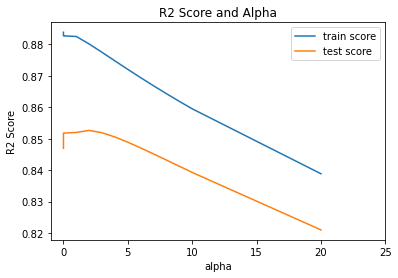

The optimum alpha is 2
The R2 Score of the model on the test dataset for optimum alpha is 0.7974857145872295
The MSE of the model on the test dataset for optimum alpha is 0.0021674721195486983


In [327]:
#Lets now build a second Ridge model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# Lets plot mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final2 = Ridge(alpha=alpha,random_state=100)
ridge_final2.fit(X_train_rfe2,y_train)
ridge_coef2 = ridge_final2.coef_
y_test_pred = ridge_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [328]:
#Lets now display the co-efficients of model
ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridge_coef2),columns=X_train_rfe2.columns)
ridge_coeff2 = ridge_coeff2.T
ridge_coeff2.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff2.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff2.head(20)

,Ridge Co-Efficient
TotalSqrFoot,0.161724
GarageArea,0.116254
TotalNoOfBathrooms,0.066629
OverallCond,0.065650
LotArea,0.039030
TotRmsAbvGrd,0.032450
TotalPorchSf,0.031344
Neighborhood_Veenker,0.030141
Neighborhood_StoneBr,0.029971
MSSubClass_70,0.026807


### The above table shows the top 20 features which impact the price of house.

## Lasso Regression

In [329]:
#Lets now try the Lasso regression model with arbitrary alpha to understand the value ranges
lasso1 = Lasso(alpha=0.0001)        
lasso1.fit(X_train_rfe2, y_train) 

y_test_pred = lasso1.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for 0.0001 alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

The R2 Score of the model on the test dataset for 0.0001 alpha is 0.7964868946132145
The MSE of the model on the test dataset for optimum alpha is 0.002178162300943622


Fitting 11 folds for each of 11 candidates, totalling 121 fits


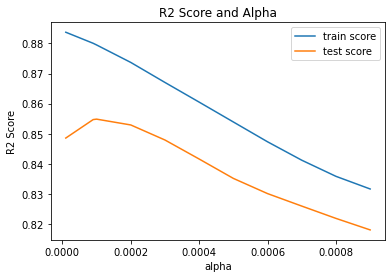

The optimum alpha is 0.0001
The R2 Score of the model on the test dataset for optimum alpha is 0.7964868946132145
The MSE of the model on the test dataset for optimum alpha is 0.002178162300943622


In [330]:
# Let us build a Lasso Model with GridSearch CV to find optimum alpha
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009 ]}
lasso = Lasso(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
lasso_final2 = Lasso(alpha=alpha,random_state=100)
lasso_final2.fit(X_train_rfe2,y_train)
lasso_coef2 = lasso_final2.coef_
y_test_pred = lasso_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [331]:
#Lets display co-efficients of the model
lasso_coeff2 = pd.DataFrame(np.atleast_2d(lasso_coef2),columns=X_train_rfe2.columns)
lasso_coeff2 = lasso_coeff2.T
lasso_coeff2.rename(columns={0: "Lasso Co-Efficient"},inplace=True)
lasso_coeff2.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
lasso_coeff2.head(20)

,Lasso Co-Efficient
TotalSqrFoot,0.196702
GarageArea,0.128735
OverallCond,0.066294
TotalNoOfBathrooms,0.060259
LotArea,0.035915
TotalPorchSf,0.026834
Neighborhood_StoneBr,0.025067
TotRmsAbvGrd,0.024709
BsmtQual_Ex,0.023347
OpenPorchSF,0.020177


### The above table shows the top 20 features which impact the price of house.

## Final Ridge Regression Model is:

In [332]:
ridge_final2

Ridge(alpha=2, random_state=100)

## Final Lasso Regression Model is:

In [333]:
lasso_final2

Lasso(alpha=0.0001, random_state=100)

### R2 score is approx 0.84 on both Ridge and Lasso Models. 
### As per our models, following features influence the house price:
- 1) Total area in square foot
- 2) Total Garage Area
- 3) Total No of Bathrooms
- 4) Overall Condition
- 5) Lot Size
- 6) Centrally Air Conditioning
- 7) Total Porch Area (Open + Enclosed)
- 8) Kitchen Quality
- 9) Basement Quality
- 10) Neighborhood

# Assignment Part-II

## Question1) What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

### Answer: From our analysis done in Part I, we see the optimal value of alpha is 2 (for Ridge regression) and alpha is 0.0001 (for Lasso regression)

#### Lets now check the changes in model after doubling the value of alpha
#### For Ridge regression, we will double value of alpha which becomes 4 

In [334]:
ridge_alpha_doubled = Ridge(alpha=4,random_state=100)
ridge_alpha_doubled.fit(X_train_rfe2,y_train)
ridge_alpha_doubled_coef = ridge_alpha_doubled.coef_
y_test_pred = ridge_alpha_doubled.predict(X_test_rfe2)
print('R2 Score of Ridge model on test dataset for doubled value of alpha = ',r2_score(y_test, y_test_pred))
print('MSE of Ridge model on test dataset for doubled value of alpha = ', mean_squared_error(y_test, y_test_pred))
ridge_alpha_doubled_coef = pd.DataFrame(np.atleast_2d(ridge_alpha_doubled_coef),columns=X_train_rfe2.columns)
ridge_alpha_doubled_coef = ridge_alpha_doubled_coef.T
ridge_alpha_doubled_coef.rename(columns={0: 'Ridge Model Doubled Alpha Co-Efficient'},inplace=True)
ridge_alpha_doubled_coef.sort_values(by=['Ridge Model Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables after doubling the alpha value are as follows:')
ridge_alpha_doubled_coef.head(20)

R2 Score of model on test dataset for doubled value of alpha =  0.7933990805211957
MSE of model on test dataset for doubled value of alpha =  0.002211210591542772
The most important predictor variables after doubling the alpha value are as follows:


,Ridge Model Doubled Alpha Co-Efficient
TotalSqrFoot,0.142311
GarageArea,0.104930
TotalNoOfBathrooms,0.062920
OverallCond,0.061542
TotRmsAbvGrd,0.039411
LotArea,0.035790
TotalPorchSf,0.032456
Neighborhood_StoneBr,0.027246
BsmtQual_Ex,0.025614
LotFrontage,0.025117


#### For Lasso regression, we will double value of alpha which becomes 0.0002

In [335]:
lasso_alpha_doubled = Lasso(alpha=0.0002,random_state=100)
lasso_alpha_doubled.fit(X_train_rfe2,y_train)
lasso_alpha_doubled_coeff = lasso_alpha_doubled.coef_
y_test_pred = lasso_alpha_doubled.predict(X_test_rfe2)
print('R2 Score of Lasso model on test dataset for doubled value of alpha = ',r2_score(y_test, y_test_pred))
print('MSE of Lasso model on test dataset for doubled value of alpha', mean_squared_error(y_test, y_test_pred))
lasso_alpha_doubled_coeff = pd.DataFrame(np.atleast_2d(lasso_alpha_doubled_coeff),columns=X_train_rfe2.columns)
lasso_alpha_doubled_coeff = lasso_alpha_doubled_coeff.T
lasso_alpha_doubled_coeff.rename(columns={0: 'Lasso Model Doubled Alpha Co-Efficient'},inplace=True)
lasso_alpha_doubled_coeff.sort_values(by=['Lasso Model Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables after doubling the alpha value are as follows:')
lasso_alpha_doubled_coeff.head(20)

R2 Score of Lasso model on test dataset for doubled value of alpha =  0.7909915598247503
MSE of Lasso model on test dataset for doubled value of alpha 0.0022369778305113505
The most important predictor variables after doubling the alpha value are as follows:


,Lasso Model Doubled Alpha Co-Efficient
TotalSqrFoot,0.199039
GarageArea,0.123918
OverallCond,0.062796
TotalNoOfBathrooms,0.052147
TotRmsAbvGrd,0.028907
TotalPorchSf,0.027062
BsmtQual_Ex,0.024043
LotArea,0.022112
Neighborhood_StoneBr,0.018196
KitchenQual_Ex,0.015432


### Conclusions of doubling the alpha value for both Ridge and Lasso regression:
- 1) As the alpha value was small, doubling this value did not have much impact in both the models.
- 2) Both R2 and MSE remained almost same even after doubling the alpha value.
- 3) Also the most important predictor variables remained same.
- 4) Ridge coefficients for alpha value 2 are slightly higher than the value for alpha value 4.
- 5) Lasso coefficients for alpha=0.0001 we see a slight difference than the value for alpha=0.0002.
- 6) However, for both Ridge and Lasso we see the feature “Total rooms above ground” has taken the 5th rank by replacing the feature “Lot Area”.

## Question 2) You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

### Answer: I feel Lasso regression would be a better option because it helps in feature elimination. Also the model will be more robust.

## Question 3) After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

### Answer: From our above analysis the 5 most important predictors are:
               - 1) Total Square foot
               - 2) Garage Area
               - 3) Total No of Bathrooms
               - 4) Overall Condition
               - 5) Lot Area

In [337]:
#Lets try removing these 5 top most predictors from dataset
X_test_rfe3 = X_test_rfe2.drop(['TotalSqrFoot','GarageArea','TotalNoOfBathrooms','OverallCond','LotArea'],axis=1)
X_train_rfe3 = X_train_rfe2.drop(['TotalSqrFoot','GarageArea','TotalNoOfBathrooms','OverallCond','LotArea'],axis=1)

# Build Lasso Model with new dataset
lasso3 = Lasso(alpha=0.0001,random_state=100)
lasso3.fit(X_train_rfe3,y_train)
lasso3_coef = lasso3.coef_
y_test_pred = lasso3.predict(X_test_rfe3)
print('R2 Score of model on test dataset = ',r2_score(y_test, y_test_pred))
print('MSE of the model on test dataset = ', mean_squared_error(y_test, y_test_pred))
lasso3_coeff = pd.DataFrame(np.atleast_2d(lasso3_coef),columns=X_train_rfe3.columns)
lasso3_coeff = lasso3_coeff.T
lasso3_coeff.rename(columns={0: 'Lasso Co-Efficient'},inplace=True)
lasso3_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
print('The next top 5 predictor variables (after removing top 5 predictors) are:')
lasso3_coeff.head(5)

R2 Score of model on test dataset =  0.7220594779896106
MSE of the model on test dataset =  0.0029747448735403703
The next top 5 predictor variables (after removing top 5 predictors) are:


,Lasso Co-Efficient
TotRmsAbvGrd,0.123240
LotFrontage,0.106755
TotalPorchSf,0.068439
Neighborhood_Veenker,0.050751
Neighborhood_StoneBr,0.036715


## Question 4) How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

### Answer: A model should be robust and generalizable so that they are not affected by outliers in the training data. The model also needs to be generalizable so that the test accuracy is not lesser than the training score. The model needs to perform accurately for any datasets other than the training dataset.  Less weightage should be given to the outliers so that the accuracy of the model is high. To build a highly accurate model, the outlier analysis should be done and only the dataset which are relevant should be retained. The outliers which are less relevant needs to be removed. This will help in increasing the accuracy of the predictions made by the model. Also, confidence intervals can be used (typically 3-5 standard deviations). This will benefit in standardizing the predictions made by the model. The model needs to be robust so that it can be trusted for predictive analysis.